##Models

In [ ]:
pca = PCA(n_components=350)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)
(pca.explained_variance_ratio_).sum()

0.9862308201784462

In [ ]:
y_val

,labels_ar,labels_bg,labels_de,labels_el,labels_en,labels_es,labels_fr,labels_hi,labels_it,labels_ja,labels_nl,labels_pl,labels_pt,labels_ru,labels_sw,labels_th,labels_tr,labels_ur,labels_vi,labels_zh
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### GRU

In [ ]:
gru = Sequential(name = 'gru')
gru.add(Input(shape = (350,1)))
gru.add(GRU(32,return_sequences=True,activation='relu',kernel_initializer=LecunNormal()))
gru.add(Dropout(0.4))
gru.add(BatchNormalization())
gru.add(GRU(64,return_sequences=False,activation='relu',kernel_initializer=LecunNormal()))
gru.add(Dropout(0.5))
gru.add(BatchNormalization())
gru.add(Dense(20,activation='softmax'))
gru.summary()
gru.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['f1_score','accuracy'])

Model: "gru"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 350, 32)        │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 350, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 350, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        18,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,860 (93.20 KB)

 Trainable params: 23,668 (92.45 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
gruhist = gru.fit(X_train_pca,y_train,validation_data=(X_val_pca,y_val),epochs = 20,batch_size = 64)

Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 128s 115ms/step - f1_score: 0.0617 - loss: 3.1014 - val_f1_score: 0.0251 - val_loss: 3.0340
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 126s 115ms/step - f1_score: 0.0673 - loss: 2.8589 - val_f1_score: 0.0371 - val_loss: 3.0224
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 147s 134ms/step - f1_score: 0.0680 - loss: 2.8274 - val_f1_score: 0.0418 - val_loss: 2.9523
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 166s 152ms/step - f1_score: 0.0952 - loss: 2.7314 - val_f1_score: 0.0975 - val_loss: 2.7320
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 160s 147ms/step - f1_score: 0.2133 - loss: 2.2959 - val_f1_score: 0.2110 - val_loss: 2.3265
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 159s 145ms/step - f1_score: 0.3461 - loss: 1.8617 - val_f1_score: 0.2592 - val_loss: 2.2105
Epoch 7/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 156s 143ms/step - f1_score: 0.3906 - loss: 1.7644 - val_f1_score: 0.3290 - val_loss: 2.1140
Epoch 8/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 165s 150ms/step - f1

In [ ]:
gru1 =  gru.fit(X_train_pca,y_train,validation_data=(X_val_pca,y_val),epochs = 20,batch_size = 64)

Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 240s 218ms/step - accuracy: 0.0669 - f1_score: 0.0631 - loss: 3.1322 - val_accuracy: 0.0533 - val_f1_score: 0.0153 - val_loss: 2.9917
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 240s 220ms/step - accuracy: 0.0928 - f1_score: 0.0667 - loss: 2.8685 - val_accuracy: 0.0690 - val_f1_score: 0.0268 - val_loss: 2.9687
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 234s 213ms/step - accuracy: 0.0990 - f1_score: 0.0691 - loss: 2.8385 - val_accuracy: 0.0959 - val_f1_score: 0.0720 - val_loss: 2.8893
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 236s 216ms/step - accuracy: 0.2127 - f1_score: 0.2005 - loss: 2.4207 - val_accuracy: 0.2495 - val_f1_score: 0.2350 - val_loss: 2.3789
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 235s 215ms/step - accuracy: 0.4051 - f1_score: 0.4030 - loss: 1.7484 - val_accuracy: 0.3567 - val_f1_score: 0.3239 - val_loss: 2.1375
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 233s 213ms/step - accuracy: 0.5419 - f1_score: 0.5424 - loss: 1.3716 - val_acc

In [ ]:
gru.evaluate(X_test_pca,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.8038 - f1_score: 0.7971 - loss: 0.7955


[0.7674481868743896,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0.8949011 , 0.5687074 , 0.9294117 , 0.88583505, 0.79687494,
        0.9257142 , 0.9685039 , 0.5958041 , 0.9390243 , 0.89962816,
        0.67736995, 0.798623  , 0.64441216, 0.25034383, 0.94335735,
        0.8564971 , 0.934322  , 0.89084893, 0.8057553 , 0.8623853 ],
       dtype=float32)>,
 0.8113999962806702]

In [ ]:
gru.evaluate(X_test_pca,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - f1_score: 0.7340 - loss: 0.9120


[0.8962005972862244,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0.75289166, 0.69893736, 0.8372092 , 0.69482756, 0.7172995 ,
        0.7809523 , 0.92886174, 0.5154362 , 0.86696225, 0.7883995 ,
        0.5426641 , 0.80827063, 0.6500777 , 0.25611505, 0.9522842 ,
        0.6331521 , 0.9278556 , 0.9075451 , 0.6870799 , 0.7502702 ],
       dtype=float32)>]

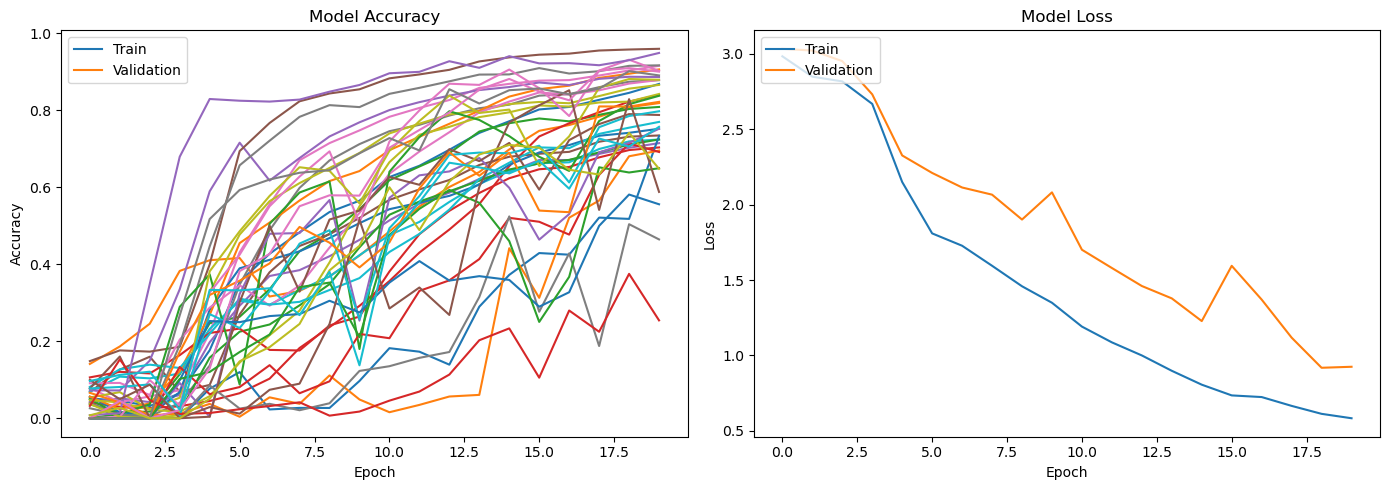

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(gruhist.history['f1_score'])
plt.plot(gruhist.history['val_f1_score'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(gruhist.history['loss'])
plt.plot(gruhist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

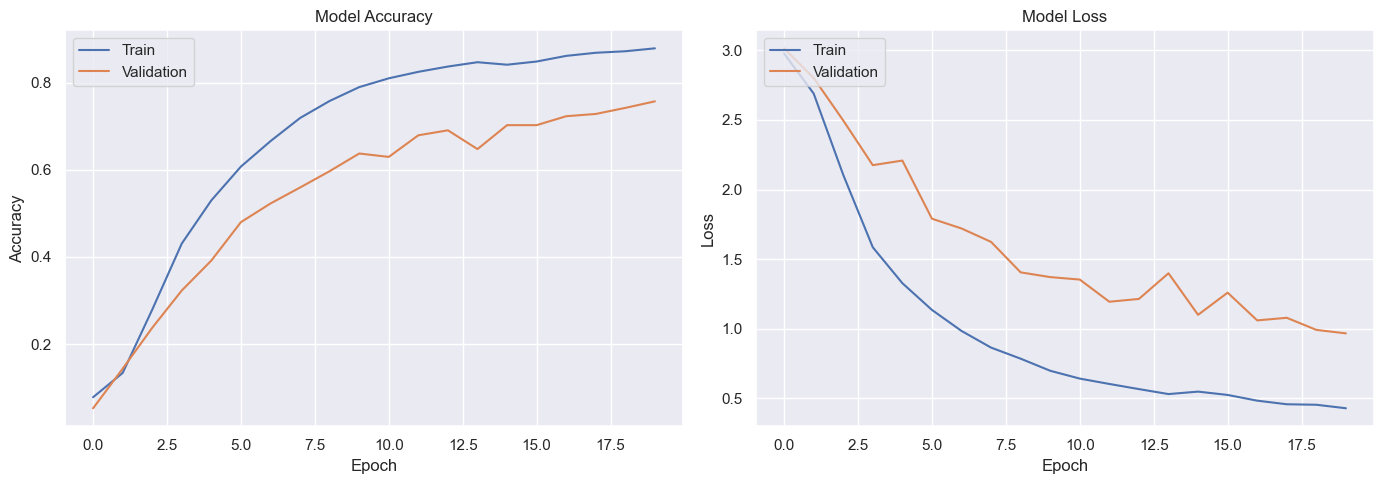

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(gru1.history['accuracy'])
plt.plot(gru1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(gru1.history['loss'])
plt.plot(gru1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### LSTM

In [ ]:
lstm1 = Sequential()
lstm1.add(Input(shape = (350,1)))
#lstm.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))  # Adjust input_dim based on vocabulary size
lstm1.add(LSTM(64, return_sequences=True)) # Bidirectional LSTM for better context understanding
lstm1.add(Dropout(0.5))
lstm1.add(LSTM(64, return_sequences=True)) # Bidirectional LSTM for better context understanding
lstm1.add(Dropout(0.5))
lstm1.add(BatchNormalization())
lstm1.add(LSTM(32))
lstm1.add(Dropout(0.5))
lstm1.add(BatchNormalization())
lstm1.add(Dense(64, activation='relu'))
lstm1.add(Dense(20, activation='softmax'))
lstm1.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy','f1_score'])

# Summary of the model
lstm1.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 350, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 350, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 350, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 350, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 350, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,132 (258.33 KB)

 Trainable params: 65,940 (257.58 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
lstmh = lstm1.fit(X_train_pca,y_train,validation_data=(X_val_pca,y_val),epochs = 20,batch_size = 64)

Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 778s 706ms/step - accuracy: 0.0626 - f1_score: 0.0582 - loss: 3.0214 - val_accuracy: 0.0702 - val_f1_score: 0.0388 - val_loss: 3.0698
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 688s 628ms/step - accuracy: 0.0855 - f1_score: 0.0727 - loss: 2.8761 - val_accuracy: 0.0754 - val_f1_score: 0.0401 - val_loss: 3.0141
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 470s 429ms/step - accuracy: 0.0990 - f1_score: 0.0774 - loss: 2.8379 - val_accuracy: 0.0794 - val_f1_score: 0.0426 - val_loss: 2.9288
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1750s 2s/step - accuracy: 0.1385 - f1_score: 0.1185 - loss: 2.6070 - val_accuracy: 0.1928 - val_f1_score: 0.1211 - val_loss: 2.3006
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 478s 437ms/step - accuracy: 0.1977 - f1_score: 0.1789 - loss: 2.2758 - val_accuracy: 0.1948 - val_f1_score: 0.1384 - val_loss: 2.5869
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 496s 453ms/step - accuracy: 0.2698 - f1_score: 0.2560 - loss: 1.9868 - val_accur

In [ ]:
lstm1.evaluate(X_test_pca,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.8074 - f1_score: 0.8032 - loss: 0.8604


[0.8346284031867981,
 0.8151999711990356,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0.78407955, 0.7112763 , 0.9549179 , 0.7644444 , 0.86039877,
        0.94399995, 0.96124023, 0.39228293, 0.93541664, 0.9285714 ,
        0.5756276 , 0.92914975, 0.7981042 , 0.38929433, 0.95208967,
        0.8199767 , 0.9078821 , 0.9142236 , 0.8061716 , 0.88337916],
       dtype=float32)>]

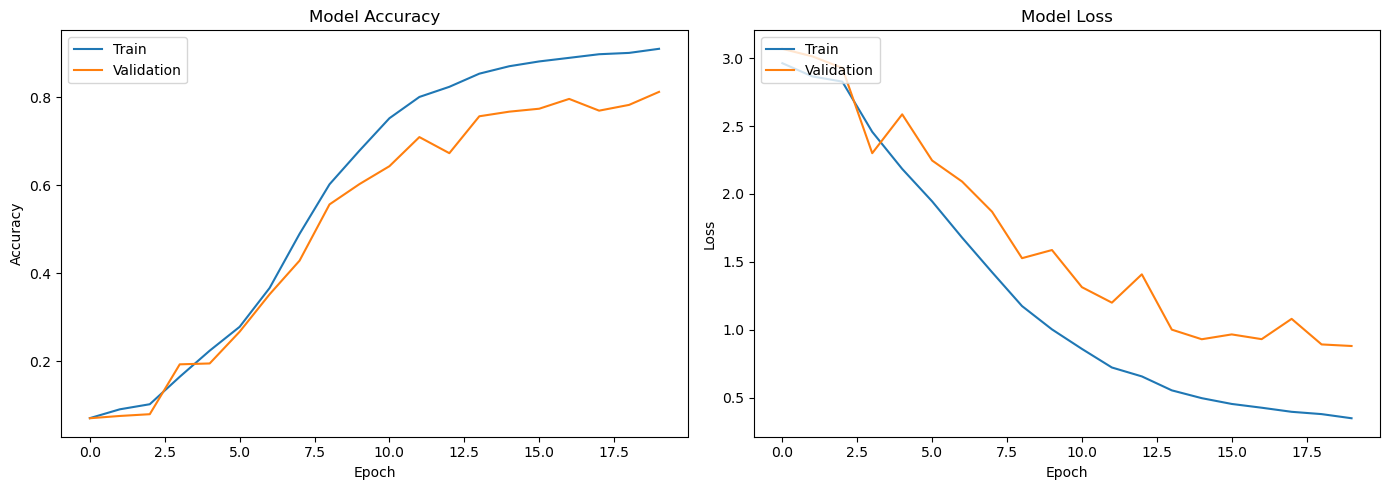

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(lstmh.history['accuracy'])
plt.plot(lstmh.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(lstmh.history['loss'])
plt.plot(lstmh.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### BILSTM

In [ ]:
lstm = Sequential()
lstm.add(Input(shape = (350,1)))
#lstm.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))  # Adjust input_dim based on vocabulary size
lstm.add(Bidirectional(LSTM(48, return_sequences=True)))  # Bidirectional LSTM for better context understanding
lstm.add(Dropout(0.5))
lstm.add(BatchNormalization())
lstm.add(LSTM(32))
lstm.add(Dropout(0.5))
lstm.add(BatchNormalization())
lstm.add(Dense(64, activation='relu'))
lstm.add(Dense(20, activation='softmax'))
class_weights = {7:2.0,13:2.0,}

# Compile the model
lstm.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy','f1_score'])

# Summary of the model
lstm.summary()


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_8 (Bidirectional) │ (None, 350, 96)        │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 350, 96)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 350, 96)        │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 32)             │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,636 (154.83 KB)

 Trainable params: 39,380 (153.83 KB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
histlstm = lstm.fit(X_train_pca,y_train,validation_data=(X_val_pca,y_val),epochs = 20,batch_size = 64, class_weight= class_weights)

Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 265s 239ms/step - accuracy: 0.0627 - f1_score: 0.0404 - loss: 3.2713 - val_accuracy: 0.0792 - val_f1_score: 0.0372 - val_loss: 3.0612
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 270s 247ms/step - accuracy: 0.0854 - f1_score: 0.0424 - loss: 3.1055 - val_accuracy: 0.0816 - val_f1_score: 0.0438 - val_loss: 2.9305
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 261s 239ms/step - accuracy: 0.0866 - f1_score: 0.0441 - loss: 3.0753 - val_accuracy: 0.0667 - val_f1_score: 0.0293 - val_loss: 2.9907
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 269s 246ms/step - accuracy: 0.1094 - f1_score: 0.0673 - loss: 2.9353 - val_accuracy: 0.1346 - val_f1_score: 0.0892 - val_loss: 2.7353
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 266s 243ms/step - accuracy: 0.1912 - f1_score: 0.1545 - loss: 2.4692 - val_accuracy: 0.2086 - val_f1_score: 0.1666 - val_loss: 2.3954
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 265s 242ms/step - accuracy: 0.2249 - f1_score: 0.1930 - loss: 2.3989 - val_acc

In [ ]:
lstm.evaluate(X_test_pca,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8156 - f1_score: 0.8153 - loss: 0.7223


[0.7161136865615845,
 0.8197000026702881,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0.75089383, 0.8562162 , 0.84297514, 0.6304162 , 0.87999994,
        0.9400196 , 0.9731876 , 0.63311255, 0.92473114, 0.92452824,
        0.7156397 , 0.9313621 , 0.78713334, 0.49956927, 0.9787663 ,
        0.5569985 , 0.86178863, 0.9265175 , 0.86446095, 0.8962962 ],
       dtype=float32)>]

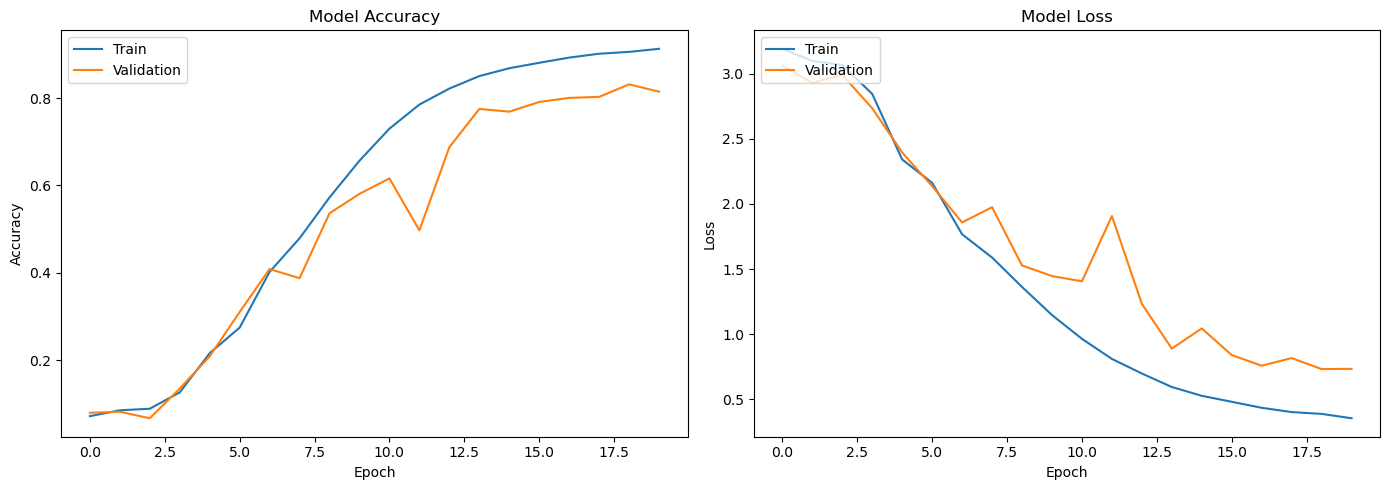

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(histlstm.history['accuracy'])
plt.plot(histlstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(histlstm.history['loss'])
plt.plot(histlstm.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
lstm.predict(z).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


2

In [ ]:
lstm.predict(pd.DataFrame(y)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


13

In [ ]:
y1 = (pca.transform(ss.transform(y)))

### 1D CNN

In [ ]:
modelcn = Sequential()
modelcn.add(Input(shape = (350,1)))
modelcn.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
modelcn.add(Dropout(0.5))
modelcn.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
modelcn.add(Dropout(0.5))
modelcn.add(MaxPooling1D(pool_size=2))
modelcn.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
modelcn.add(Dropout(0.5))
modelcn.add(Conv1D(filters=16, kernel_size=7, activation='relu'))
modelcn.add(Dropout(0.5))
modelcn.add(MaxPooling1D(pool_size=2))
modelcn.add(Dropout(0.5))
modelcn.add(Flatten())
modelcn.add(Dense(units=20, activation='sigmoid'))
modelcn.build()
modelcn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','f1_score'])
modelcn.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 344, 16)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 344, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 338, 16)        │         1,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 338, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 169, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 163, 16)        │         1,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 163, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 157, 16)        │         1,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 157, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 78, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 78, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 20)             │        24,980 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,532 (119.27 KB)

 Trainable params: 30,532 (119.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cn1dlstm = modelcn.fit(X_train_pca,y_train,validation_data=(X_val_pca,y_val),epochs = 30,batch_size = 64)

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.0787 - f1_score: 0.0770 - loss: 0.2242 - val_accuracy: 0.4737 - val_f1_score: 0.4654 - val_loss: 0.1842
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.4513 - f1_score: 0.4447 - loss: 0.1426 - val_accuracy: 0.7198 - val_f1_score: 0.7122 - val_loss: 0.1279
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.5686 - f1_score: 0.5632 - loss: 0.1197 - val_accuracy: 0.7689 - val_f1_score: 0.7678 - val_loss: 0.1113
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.6107 - f1_score: 0.6056 - loss: 0.1115 - val_accuracy: 0.7992 - val_f1_score: 0.7987 - val_loss: 0.0983
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.6273 - f1_score: 0.6225 - loss: 0.1078 - val_accuracy: 0.8263 - val_f1_score: 0.8251 - val_loss: 0.0949
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.6486 - f1_score: 0.6445 - loss: 0.1035 - val_accuracy: 0.822

In [ ]:
modelcn.evaluate(X_test_pca,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8838 - f1_score: 0.8848 - loss: 0.0707


[0.07035670429468155,
 0.8823000192642212,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0.83582085, 0.8287526 , 0.95427436, 0.80282927, 0.92450875,
        0.9564336 , 0.94187194, 0.70194   , 0.9404517 , 0.9838709 ,
        0.8049029 , 0.94884646, 0.8602383 , 0.8365878 , 0.9046692 ,
        0.8656387 , 0.91707313, 0.78805393, 0.9435084 , 0.93873304],
       dtype=float32)>]

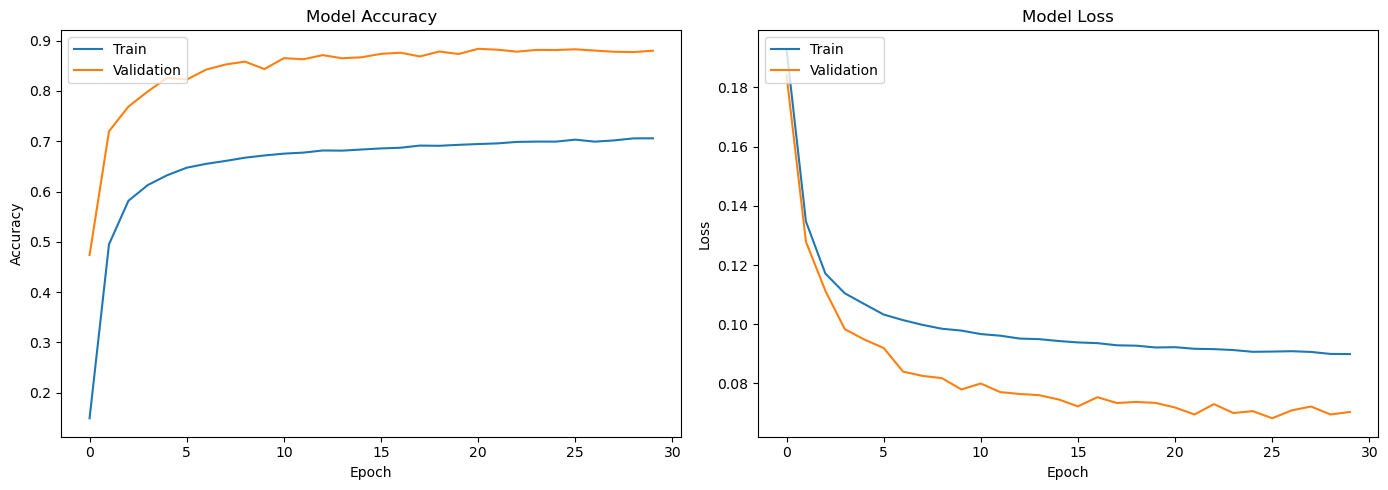

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(cn1dlstm.history['accuracy'])
plt.plot(cn1dlstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(cn1dlstm.history['loss'])
plt.plot(cn1dlstm.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### CNN+LSTM

In [ ]:
cnnlstm = Sequential()
cnnlstm.add(Input(shape = (350,1)))
cnnlstm.add(Conv1D(filters=32, kernel_size=7, padding='same', activation='relu'))
cnnlstm.add(MaxPooling1D(pool_size=2))
cnnlstm.add(Conv1D(filters=64, kernel_size=7, padding='same', activation='relu'))
cnnlstm.add(MaxPooling1D(pool_size=2))
cnnlstm.add(Bidirectional(LSTM(64)))
cnnlstm.add(Dense(20, activation='sigmoid'))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
cnnlstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','f1_score'])
print(cnnlstm.summary())

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_32 (Conv1D)              │ (None, 350, 32)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 175, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_33 (Conv1D)              │ (None, 175, 64)        │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_26 (MaxPooling1D) │ (None, 87, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,284 (325.33 KB)

 Trainable params: 83,284 (325.33 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
histcl = cnnlstm.fit(X_train_pca,y_train,validation_data=(X_val_pca,y_val),epochs = 10,batch_size = 64, callbacks=[early_stopping])

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 110s 97ms/step - accuracy: 0.5109 - f1_score: 0.5086 - loss: 0.1532 - val_accuracy: 0.8235 - val_f1_score: 0.8155 - val_loss: 0.0561
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 113s 103ms/step - accuracy: 0.9344 - f1_score: 0.9341 - loss: 0.0257 - val_accuracy: 0.8596 - val_f1_score: 0.8531 - val_loss: 0.0427
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 116s 106ms/step - accuracy: 0.9540 - f1_score: 0.9539 - loss: 0.0163 - val_accuracy: 0.9032 - val_f1_score: 0.8993 - val_loss: 0.0298
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 113s 103ms/step - accuracy: 0.9626 - f1_score: 0.9623 - loss: 0.0127 - val_accuracy: 0.8994 - val_f1_score: 0.8950 - val_loss: 0.0299
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 113s 103ms/step - accuracy: 0.9677 - f1_score: 0.9677 - loss: 0.0108 - val_accuracy: 0.9200 - val_f1_score: 0.9179 - val_loss: 0.0240
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 113s 103ms/step - accuracy: 0.9710 - f1_score: 0.9711 - loss: 0.0093 - val_accu

In [ ]:
cnnlstm.evaluate(X_test_pca,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9391 - f1_score: 0.9377 - loss: 0.0198


[0.020196808502078056,
 0.9384999871253967,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0.9334698 , 0.9253731 , 0.974155  , 0.9293892 , 0.9355468 ,
        0.97061795, 0.9841269 , 0.9484536 , 0.96890664, 0.94375587,
        0.90073526, 0.92366403, 0.8976834 , 0.78422266, 0.96709865,
        0.93617016, 0.969031  , 0.9744637 , 0.9467336 , 0.94061303],
       dtype=float32)>]

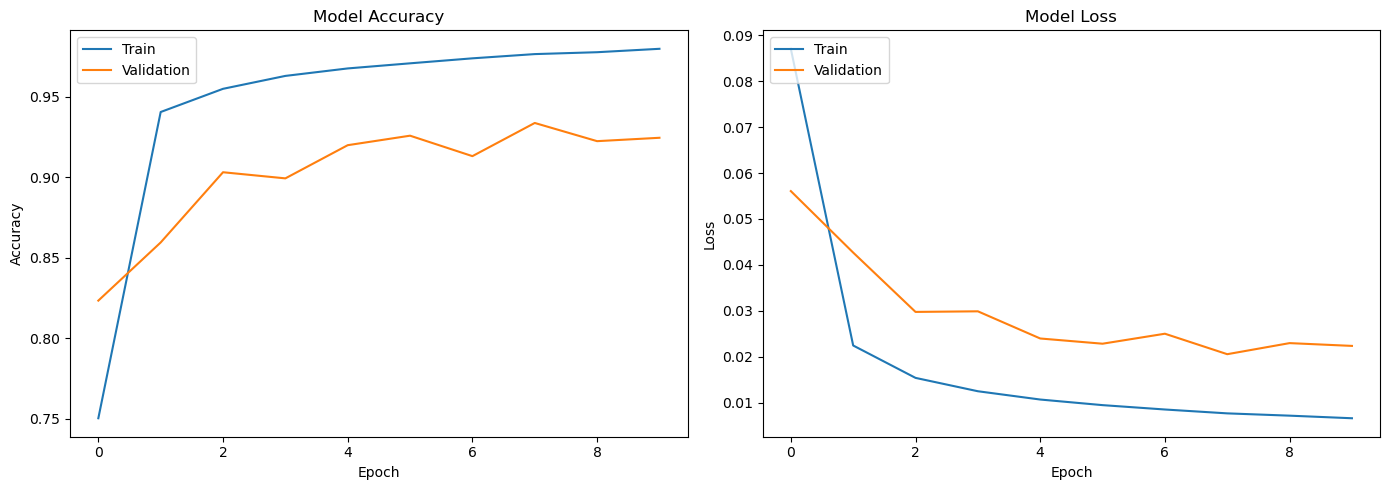

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(histcl.history['accuracy'])
plt.plot(histcl.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(histcl.history['loss'])
plt.plot(histcl.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

###  Finetuned LLM - Zero Shot

In [ ]:
from transformers import pipeline
pipe = pipeline("text-classification", model="papluca/xlm-roberta-base-language-detection")

/opt/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
preds = [pipe(x) for x in tqdm(dataset['test']['text'])]

100%|██████████| 10000/10000 [09:40<00:00, 17.23it/s]


In [ ]:
preds[:15]

[[{'label': 'nl', 'score': 0.9956241250038147}],
 [{'label': 'nl', 'score': 0.9958615899085999}],
 [{'label': 'es', 'score': 0.992653489112854}],
 [{'label': 'it', 'score': 0.9956134557723999}],
 [{'label': 'ar', 'score': 0.9939490556716919}],
 [{'label': 'ru', 'score': 0.9946050047874451}],
 [{'label': 'tr', 'score': 0.9953035116195679}],
 [{'label': 'nl', 'score': 0.9958749413490295}],
 [{'label': 'fr', 'score': 0.9871856570243835}],
 [{'label': 'es', 'score': 0.993526816368103}],
 [{'label': 'sw', 'score': 0.7702438831329346}],
 [{'label': 'el', 'score': 0.9951754808425903}],
 [{'label': 'es', 'score': 0.9925552010536194}],
 [{'label': 'pl', 'score': 0.9264085292816162}],
 [{'label': 'ar', 'score': 0.9937325119972229}]]

In [ ]:
pred_lab = [d[0]['label'] for d in preds]

In [ ]:
f1_score(dataset['test']['labels'], pred_lab,average='macro')

0.995998259218173